# Machine Learning Engineer Nanodegree

## Project: Complaints Text Classification 

### 04. Trainning Model

In the previous phase I created the training data and the test data, and now I am ready to define and train the models that we propose to do. 

The purpose of this notebook is to train the various classification models that learn how to label a complaint with a specific product, based on the features that the model provides.

This notebook is divided in the following steps:

* Load the data set for trainning and test
* Load the tokenizer features 
* Define the classification models and a training script
* Training the models
* Assess the classification models defined
* Refine the models using text-cleaning techniques or using the definition of new hyperparameters

**Step 1 - Importing packages**

In [215]:
import numpy as np
import pandas as pd
from scipy.stats import randint
import os
import re
import pickle

#Seed - https://www.mikulskibartosz.name/how-to-set-the-global-random_state-in-scikit-learn/
seed = 90 #np.random.seed(31415)

# Pre-Processing
from sklearn.preprocessing import LabelEncoder
from langdetect import detect
import nltk
from nltk.corpus import stopwords
from stop_words import get_stop_words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import chi2

# EDA
import sweetviz as sv
from pandas_profiling import ProfileReport as ppr

# Ploting
import matplotlib.pyplot as plt
import seaborn as sns

# Classifiers
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

# Metrics to score classifiers
from sklearn.metrics import confusion_matrix, classification_report, plot_precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, log_loss

# Data splitting, CV
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold, StratifiedKFold

# My libraries:
import utilities.helpers as helpers
import source_sklearn.train as train

# Warnings;
import warnings; warnings.simplefilter('ignore')

**Step 2 - Load training and test data**

In [149]:
# Load pickle file to a data frame
dest_folder = '../Capstone-Project/classification_data/';
# X_train 
file_name = 'X_train'
X_train = helpers.load_pickle(dest_folder,file_name);

# X_test 
file_name = 'X_test'
X_test = helpers.load_pickle(dest_folder,file_name);

# y_train 
file_name = 'y_train'
y_train = helpers.load_pickle(dest_folder,file_name);

# y_test 
file_name = 'y_test'
y_test = helpers.load_pickle(dest_folder,file_name);

# X_train 
file_name = 'X_train_clean'
X_train_clean = helpers.load_pickle(dest_folder,file_name);

# X_test 
file_name = 'X_test_clean'
X_test_clean = helpers.load_pickle(dest_folder,file_name);

# Features Train
train_tokenize_CountVectorizer_1 = helpers.load_pickle(dest_folder,'train_tokenize_CountVectorizer_1');

train_tokenize_TfidfVectorizer_1 = helpers.load_pickle(dest_folder,'train_tokenize_TfidfVectorizer_1');

train_tokenize_CountVectorizer_1_clean = helpers.load_pickle(dest_folder,'train_tokenize_CountVectorizer_1_clean');

train_tokenize_TfidfVectorizer_1_clean = helpers.load_pickle(dest_folder,'train_tokenize_TfidfVectorizer_1_clean');

train_tokenize_CountVectorizer_2 = helpers.load_pickle(dest_folder,'train_tokenize_CountVectorizer_2');

train_tokenize_TfidfVectorizer_2 = helpers.load_pickle(dest_folder,'train_tokenize_TfidfVectorizer_2');

train_tokenize_CountVectorizer_2_clean = helpers.load_pickle(dest_folder,'train_tokenize_CountVectorizer_2_clean');

train_tokenize_TfidfVectorizer_2_clean = helpers.load_pickle(dest_folder,'train_tokenize_TfidfVectorizer_2_clean');

# Features Test
test_tokenize_CountVectorizer_1 = helpers.load_pickle(dest_folder,'test_tokenize_CountVectorizer_1');

test_tokenize_TfidfVectorizer_1 = helpers.load_pickle(dest_folder,'test_tokenize_TfidfVectorizer_1');

test_tokenize_CountVectorizer_1_clean = helpers.load_pickle(dest_folder,'test_tokenize_CountVectorizer_1_clean');

test_tokenize_TfidfVectorizer_1_clean = helpers.load_pickle(dest_folder,'test_tokenize_TfidfVectorizer_1_clean');

test_tokenize_CountVectorizer_2 = helpers.load_pickle(dest_folder,'test_tokenize_CountVectorizer_2');

test_tokenize_TfidfVectorizer_2 = helpers.load_pickle(dest_folder,'test_tokenize_TfidfVectorizer_2');

test_tokenize_CountVectorizer_2_clean = helpers.load_pickle(dest_folder,'test_tokenize_CountVectorizer_2_clean');

test_tokenize_TfidfVectorizer_2_clean = helpers.load_pickle(dest_folder,'test_tokenize_TfidfVectorizer_2_clean');

# Features Model

word_vectorizer_tokenize_CountVectorizer_1 = helpers.load_pickle(dest_folder,'word_vectorizer_tokenize_CountVectorizer_1');

word_vectorizer_tokenize_TfidfVectorizer_1 = helpers.load_pickle(dest_folder,'word_vectorizer_tokenize_TfidfVectorizer_1');

word_vectorizer_tokenize_CountVectorizer_1_clean = helpers.load_pickle(dest_folder,'word_vectorizer_tokenize_CountVectorizer_1_clean');

word_vectorizer_tokenize_TfidfVectorizer_1_clean = helpers.load_pickle(dest_folder,'word_vectorizer_tokenize_TfidfVectorizer_1_clean');

word_vectorizer_tokenize_CountVectorizer_2 = helpers.load_pickle(dest_folder,'word_vectorizer_tokenize_CountVectorizer_2');

word_vectorizer_tokenize_TfidfVectorizer_2 = helpers.load_pickle(dest_folder,'word_vectorizer_tokenize_TfidfVectorizer_2');

word_vectorizer_tokenize_CountVectorizer_2_clean = helpers.load_pickle(dest_folder,'word_vectorizer_tokenize_CountVectorizer_2_clean');

word_vectorizer_tokenize_TfidfVectorizer_2_clean = helpers.load_pickle(dest_folder,'word_vectorizer_tokenize_TfidfVectorizer_2_clean');


X_train pickle file loaded successfully!
X_test pickle file loaded successfully!
y_train pickle file loaded successfully!
y_test pickle file loaded successfully!
X_train_clean pickle file loaded successfully!
X_test_clean pickle file loaded successfully!
train_tokenize_CountVectorizer_1 pickle file loaded successfully!
train_tokenize_TfidfVectorizer_1 pickle file loaded successfully!
train_tokenize_CountVectorizer_1_clean pickle file loaded successfully!
train_tokenize_TfidfVectorizer_1_clean pickle file loaded successfully!
train_tokenize_CountVectorizer_2 pickle file loaded successfully!
train_tokenize_TfidfVectorizer_2 pickle file loaded successfully!
train_tokenize_CountVectorizer_2_clean pickle file loaded successfully!
train_tokenize_TfidfVectorizer_2_clean pickle file loaded successfully!
test_tokenize_CountVectorizer_1 pickle file loaded successfully!
test_tokenize_TfidfVectorizer_1 pickle file loaded successfully!
test_tokenize_CountVectorizer_1_clean pickle file loaded succes

In [148]:
# Products 
file_name = 'products'
products = helpers.load_pickle(dest_folder,file_name);

# Pre Feature 
file_name = 'pre_features'
pre_features = helpers.load_pickle(dest_folder,file_name);

products pickle file loaded successfully!
pre_features pickle file loaded successfully!


**Step 3 - Algorithms**

* Support Vector Machines (Linear SVC): are a  set  of  supervised learning  methods  which  have  been  used  for  classification. Benefits for  using SVM  such  as:  i) It  is  effective  is high  dimensional space, ii) Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient, iii) It is versatile  because  holds  different  kernel  functions  can  be specified  for  the  decision  function.  Common  kernels  are provided, but it is also possible to specify custom kernels  [1]. Effective in high dimensional spaces. Still effective in cases where number of dimensions is greater than the number of samples. Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient [13].


* Naive Bayes Classifier (GaussianNB and MultinomialNB).  Is simple supervised learning algorithms / statistical classification technique based on Bayes Theorem. Is fast, accurate and reliable algorithm. Naive Bayes classifiers have high accuracy and fast on large datasets, because assumes that the effect of a particular feature in a class is independent of other features. The GaussianNB Algorithm use goussion distribution and the second one use de multimonial distribution. The multinomial classification algorithm is the most suitable for word counting. TFIDF works as well.


* Logistic Regression: is a statistical technique that aims to produce, from a set of observations, a model that allows the prediction of values taken by a categorical variable.


* Random Forest: 


* K-Nearest Neighbors: KNN algorithm is used to classify by finding the K nearest matches in training data and then using the label of closest matches to predict.


* Decision Trees:  currently  one  of  the most  important  supervised  learning algorithms. This use a decision tree to classifie the dataset in smallers subsets. The  major  benefits  of decision  trees  are  i)  produce  intensive  results,  ii)  easy  to understand,  iii)  and  holds  well-organized  knowledge  structure [1].

#### **Step 4 - Modeling**

Since the training data has been loaded successfully, it's time to define and train the algorithms (custom Scikit-learn classifier).

In [106]:
#directory 
!pygmentize source_sklearn/train.py

from __future__ import print_function

import argparse
import numpy as np
import os
import pandas as pd
import utilities.helpers as helpers
import sklearn.externals
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import chi2

from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import model_selection
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate
from time import time


def split_data(df_x, df_y, is_clean: bool, is_shuffle: bool, seed: int):
    """
    This function allows the split data 
        param df: data se

To evaluate the models accuracy, I’ll  use the cross-validation - splits the training dataset in k folds, being k - 1 folders used to train the model and the last one to test it. This strategy will repeat K times and the overall performance is the average of the computed values by algorithm and tokenizer type.

To estimate the model's accuracy, we used a 5-fold cross validation that split the dataset into 5 parts, 4 of training and 1 of testing. 

**Step 4 - Defining and training a model**

In [107]:
n_splits = 5
model_type='CountVectorizer'

In [108]:
df_training_models_cv_scores_CountVectorizer_1_clean = train.cv_metric_scores(train_tokenize_CountVectorizer_1_clean, y_train, n_splits, seed, model_type)
df_training_models_cv_scores_CountVectorizer_1_clean['simulation'] = 'CountVectorizer-1-Clean'

LogisticRegression
LogisticRegression(random_state=90)
40.4
LinearSVC
LinearSVC()
7.2
DecisionTreeClassifier
DecisionTreeClassifier(random_state=90)
91.0
KNeighborsClassifier
KNeighborsClassifier()
38.7
GaussianNB
GaussianNB()
0.1
MultinomialNB
MultinomialNB()
3.1
MultinomialNB_prior
MultinomialNB()
2.9
RandomForestClassifier
RandomForestClassifier(max_depth=5, random_state=90)
10.6
RandomForestClassifier_200
RandomForestClassifier(max_depth=5, n_estimators=200, random_state=90)
14.8


In [109]:
df_training_models_cv_scores_CountVectorizer_2_clean = train.cv_metric_scores(train_tokenize_CountVectorizer_2_clean, y_train, n_splits, seed, model_type)
df_training_models_cv_scores_CountVectorizer_2_clean['simulation'] = 'CountVectorizer-2-Clean'

LogisticRegression
LogisticRegression(random_state=90)
127.1
LinearSVC
LinearSVC()
12.5
DecisionTreeClassifier
DecisionTreeClassifier(random_state=90)
184.5
KNeighborsClassifier
KNeighborsClassifier()
64.8
GaussianNB
GaussianNB()
0.1
MultinomialNB
MultinomialNB()
3.2
MultinomialNB_prior
MultinomialNB()
1.9
RandomForestClassifier
RandomForestClassifier(max_depth=5, random_state=90)
6.2
RandomForestClassifier_200
RandomForestClassifier(max_depth=5, n_estimators=200, random_state=90)
10.4


In [110]:
df_training_models_cv_scores_CountVectorizer_1 = train.cv_metric_scores(train_tokenize_CountVectorizer_1, y_train, n_splits, seed,  model_type)
df_training_models_cv_scores_CountVectorizer_1['simulation'] = 'CountVectorizer-1-NotClean'

LogisticRegression
LogisticRegression(random_state=90)
28.9
LinearSVC
LinearSVC()
5.5
DecisionTreeClassifier
DecisionTreeClassifier(random_state=90)
61.2
KNeighborsClassifier
KNeighborsClassifier()
26.2
GaussianNB
GaussianNB()
0.1
MultinomialNB
MultinomialNB()
1.5
MultinomialNB_prior
MultinomialNB()
1.6
RandomForestClassifier
RandomForestClassifier(max_depth=5, random_state=90)
5.8
RandomForestClassifier_200
RandomForestClassifier(max_depth=5, n_estimators=200, random_state=90)
10.9


In [111]:
df_training_models_cv_scores_CountVectorizer_2 = train.cv_metric_scores(train_tokenize_CountVectorizer_2, y_train, n_splits, seed, model_type)
df_training_models_cv_scores_CountVectorizer_2['simulation'] = 'CountVectorizer-2-NotClean'

LogisticRegression
LogisticRegression(random_state=90)
78.4
LinearSVC
LinearSVC()
7.7
DecisionTreeClassifier
DecisionTreeClassifier(random_state=90)
121.9
KNeighborsClassifier
KNeighborsClassifier()
28.9
GaussianNB
GaussianNB()
0.1
MultinomialNB
MultinomialNB()
1.5
MultinomialNB_prior
MultinomialNB()
1.8
RandomForestClassifier
RandomForestClassifier(max_depth=5, random_state=90)
5.8
RandomForestClassifier_200
RandomForestClassifier(max_depth=5, n_estimators=200, random_state=90)
10.4


In [112]:
n_splits = 5
model_type='TfidfVectorizer'

In [113]:
df_training_models_cv_scores_TfidfVectorizer_1_clean = train.cv_metric_scores(train_tokenize_TfidfVectorizer_1_clean, y_train, n_splits, seed, model_type)
df_training_models_cv_scores_TfidfVectorizer_1_clean['simulation'] = 'TfidfVectorizer-1-Clean'

LogisticRegression
LogisticRegression(random_state=90)
386.6
LinearSVC
LinearSVC()
16.2
DecisionTreeClassifier
DecisionTreeClassifier(random_state=90)
667.3
GaussianNB
GaussianNB()
57.6
MultinomialNB
MultinomialNB()
11.1
MultinomialNB_prior
MultinomialNB()
10.3
RandomForestClassifier
RandomForestClassifier(max_depth=5, random_state=90)
84.8
RandomForestClassifier_200
RandomForestClassifier(max_depth=5, n_estimators=200, random_state=90)
158.6


In [114]:
df_training_models_cv_scores_TfidfVectorizer_1 = train.cv_metric_scores(train_tokenize_TfidfVectorizer_1, y_train, n_splits, seed, model_type)
df_training_models_cv_scores_TfidfVectorizer_1['simulation'] = 'TfidfVectorizer-1-NotClean'

LogisticRegression
LogisticRegression(random_state=90)
375.4
LinearSVC
LinearSVC()
16.5
DecisionTreeClassifier
DecisionTreeClassifier(random_state=90)
661.9
GaussianNB
GaussianNB()
53.5
MultinomialNB
MultinomialNB()
10.8
MultinomialNB_prior
MultinomialNB()
11.1
RandomForestClassifier
RandomForestClassifier(max_depth=5, random_state=90)
85.7
RandomForestClassifier_200
RandomForestClassifier(max_depth=5, n_estimators=200, random_state=90)
161.4


In [115]:
#df_training_models_cv_scores_TfidfVectorizer_2_clean = train.cv_metric_scores(train_tokenize_TfidfVectorizer_2_clean, y_train, n_splits, seed, model_type)
#df_training_models_cv_scores_TfidfVectorizer_2_clean['simulation'] = 'TfidfVectorizer-2-Clean'

In [116]:
#df_training_models_cv_scores_TfidfVectorizer_2 = train.cv_metric_scores(train_tokenize_TfidfVectorizer_2, y_train, n_splits, seed, model_type)
#df_training_models_cv_scores_TfidfVectorizer_2['simulation'] = 'TfidfVectorizer-2-NotClean'

In [117]:
_df_training_models_cv_scores = pd.concat([df_training_models_cv_scores_TfidfVectorizer_1_clean, 
                                         df_training_models_cv_scores_TfidfVectorizer_1, 
                                         df_training_models_cv_scores_CountVectorizer_1_clean, 
                                         df_training_models_cv_scores_CountVectorizer_1,
                                         df_training_models_cv_scores_CountVectorizer_2_clean, 
                                         df_training_models_cv_scores_CountVectorizer_2
                                         #df_training_models_cv_scores_TfidfVectorizer_2_clean, 
                                         #df_training_models_cv_scores_TfidfVectorizer_2,
                                         ], axis=0).reset_index()

In [118]:
_df_training_models_cv_scores 

,index,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro,test_precision_weighted,test_recall_weighted,test_f1_weighted,model_desc,model_duration,simulation
0,0,73.520148,0.396977,0.844475,0.680324,0.572326,0.588134,0.826652,0.844475,0.829681,LogisticRegression,386.6,TfidfVectorizer-1-Clean
1,1,69.061630,0.298862,0.840309,0.748933,0.561346,0.575918,0.827207,0.840309,0.823864,LogisticRegression,386.6,TfidfVectorizer-1-Clean
2,2,79.772890,0.332282,0.846429,0.829277,0.573308,0.588864,0.843064,0.846429,0.830895,LogisticRegression,386.6,TfidfVectorizer-1-Clean
3,3,85.685785,0.389722,0.839286,0.711818,0.569604,0.590763,0.825072,0.839286,0.824755,LogisticRegression,386.6,TfidfVectorizer-1-Clean
4,4,76.378492,0.471815,0.829762,0.588477,0.545750,0.559920,0.802279,0.829762,0.812929,LogisticRegression,386.6,TfidfVectorizer-1-Clean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,40,1.510728,0.564052,0.458639,0.147645,0.133203,0.103453,0.390313,0.458639,0.326269,RandomForestClassifier_200,10.4,CountVectorizer-2-NotClean
256,41,1.513941,0.611170,0.445348,0.143004,0.126957,0.093832,0.379384,0.445348,0.304767,RandomForestClassifier_200,10.4,CountVectorizer-2-NotClean
257,42,1.569237,0.569780,0.444841,0.143709,0.126678,0.093410,0.380898,0.444841,0.303869,RandomForestClassifier_200,10.4,CountVectorizer-2-NotClean
258,43,1.448004,0.579244,0.457738,0.144891,0.132795,0.102801,0.384383,0.457738,0.324893,RandomForestClassifier_200,10.4,CountVectorizer-2-NotClean


In [119]:
# Create a new dataframe with rename columns
df_training_models_cv_scores_s1 = _df_training_models_cv_scores.rename(index=str, columns={'simulation':'simulation',
                                                                                             'model':'model_desc',
                                                                                             "test_accuracy": "accuracy", 
                                                                                             "test_precision_macro": "precision_macro",
                                                                                             'test_recall_macro':'recall_macro',
                                                                                             'test_f1_macro':'f1_macro',
                                                                                             'test_precision_weighted':'precision_weighted', 
                                                                                             'test_recall_weighted':'recall_weighted', 
                                                                                             'test_f1_weighted':'f1_weighted',
                                                                                             #'test_roc_auc':'roc_auc', 
                                                                                             'duration':'model_duration', 
                                                                                             'fit_time':'fit_time',
                                                                                             'score_time':'score_time'})

In [120]:
df_training_models_cv_scores_s1.head(2)

,index,fit_time,score_time,accuracy,precision_macro,recall_macro,f1_macro,precision_weighted,recall_weighted,f1_weighted,model_desc,model_duration,simulation
0,0,73.520148,0.396977,0.844475,0.680324,0.572326,0.588134,0.826652,0.844475,0.829681,LogisticRegression,386.6,TfidfVectorizer-1-Clean
1,1,69.061630,0.298862,0.840309,0.748933,0.561346,0.575918,0.827207,0.840309,0.823864,LogisticRegression,386.6,TfidfVectorizer-1-Clean


In [121]:
df_training_models_cv_scores_s1 = df_training_models_cv_scores_s1.sort_values(by='accuracy', ascending=False)
df_training_models_cv_scores_s1.head(10)

,index,fit_time,score_time,accuracy,precision_macro,recall_macro,f1_macro,precision_weighted,recall_weighted,f1_weighted,model_desc,model_duration,simulation
175,5,2.471698,0.281343,0.848641,0.724600,0.605764,0.632631,0.837031,0.848641,0.838379,LinearSVC,12.5,CountVectorizer-2-Clean
223,8,1.354443,0.180361,0.848413,0.746243,0.623943,0.658536,0.839582,0.848413,0.839869,LinearSVC,7.7,CountVectorizer-2-NotClean
220,5,1.401675,0.170602,0.848244,0.722380,0.607504,0.635304,0.836865,0.848244,0.838099,LinearSVC,7.7,CountVectorizer-2-NotClean
42,2,72.042412,0.309558,0.846825,0.834223,0.576063,0.593976,0.843890,0.846825,0.831575,LogisticRegression,375.4,TfidfVectorizer-1-NotClean
2,2,79.772890,0.332282,0.846429,0.829277,0.573308,0.588864,0.843064,0.846429,0.830895,LogisticRegression,386.6,TfidfVectorizer-1-Clean
222,7,1.377966,0.175527,0.845833,0.754687,0.593400,0.616906,0.836597,0.845833,0.834274,LinearSVC,7.7,CountVectorizer-2-NotClean
178,8,2.195734,0.355317,0.845437,0.722308,0.613593,0.645184,0.834906,0.845437,0.836495,LinearSVC,12.5,CountVectorizer-2-Clean
40,0,75.686888,0.306707,0.844674,0.635418,0.568893,0.580554,0.822663,0.844674,0.829363,LogisticRegression,375.4,TfidfVectorizer-1-NotClean
0,0,73.520148,0.396977,0.844475,0.680324,0.572326,0.588134,0.826652,0.844475,0.829681,LogisticRegression,386.6,TfidfVectorizer-1-Clean
221,6,1.309198,0.174913,0.844277,0.733819,0.604064,0.635463,0.833525,0.844277,0.833732,LinearSVC,7.7,CountVectorizer-2-NotClean


In [122]:
# 1. Pickling our subsetted dataframe
dest_folder = '../Capstone-Project/classification_data/';
file_name = 'df_training_models_cv_scores_s1'
helpers.save_pickle(dest_folder, df_training_models_cv_scores_s1, file_name);

In [123]:
res = df_training_models_cv_scores_s1.groupby(['model_desc'], as_index=False)['accuracy'].mean()
res.sort_values(by=['accuracy'], ascending=False)

,model_desc,accuracy
3,LinearSVC,0.838597
4,LogisticRegression,0.837103
5,MultinomialNB,0.733771
6,MultinomialNB_prior,0.733771
0,DecisionTreeClassifier,0.720333
7,RandomForestClassifier,0.506798
8,RandomForestClassifier_200,0.501415
2,KNeighborsClassifier,0.483930
1,GaussianNB,0.403897


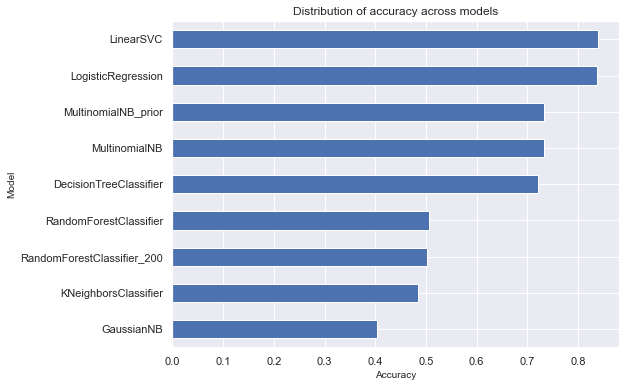

In [233]:
# Top training model
fig = plt.figure(figsize=(8,6))
sns.set(font_scale=1)
df_training_models_cv_scores_s1.groupby('model_desc').accuracy.mean().sort_values().plot.barh(ylim=0, title='Distribution of accuracy across models');
plt.xlabel('Accuracy', fontsize = 10);
plt.ylabel('Model', fontsize = 10);
plt.show();

In [124]:
res_2 = df_training_models_cv_scores_s1.groupby(['model_desc', 'simulation'], as_index=False)['accuracy'].mean()

In [125]:
res_2 = res_2.sort_values(by=['accuracy'], ascending=False)
res_2.head(5)

,model_desc,simulation,accuracy
19,LinearSVC,CountVectorizer-2-NotClean,0.844417
18,LinearSVC,CountVectorizer-2-Clean,0.842354
27,LogisticRegression,TfidfVectorizer-1-NotClean,0.840489
26,LogisticRegression,TfidfVectorizer-1-Clean,0.840052
21,LinearSVC,TfidfVectorizer-1-NotClean,0.838187


The proposed models were trained and based on the above statistics, the two best ones were identified and chosen for evaluation: **SVM Linear SVC** and **Logistic Regression**. Precision metrica was the metrica used to choose these two models.

Below, a report was generated with the statistics obtained by model.

------------------------------
------------------------------
# Model: LogisticRegression
LogisticRegression Model Accuracy Score 84.09776225995874
------------------------------
------------------------------
# Classification Report
                                                    precision    recall  f1-score   support

                           Bank account or service       0.70      0.08      0.14        89
                       Checking or savings account       0.52      0.25      0.34       156
                       Credit card or prepaid card       0.74      0.67      0.70       390
                Credit reporting, repair, or other       0.85      0.90      0.87      1490
                                   Debt collection       0.81      0.79      0.80       755
                                              Loan       0.77      0.67      0.72       345
Money transfer, virtual currency, or money service       0.88      0.96      0.92      2594
                             

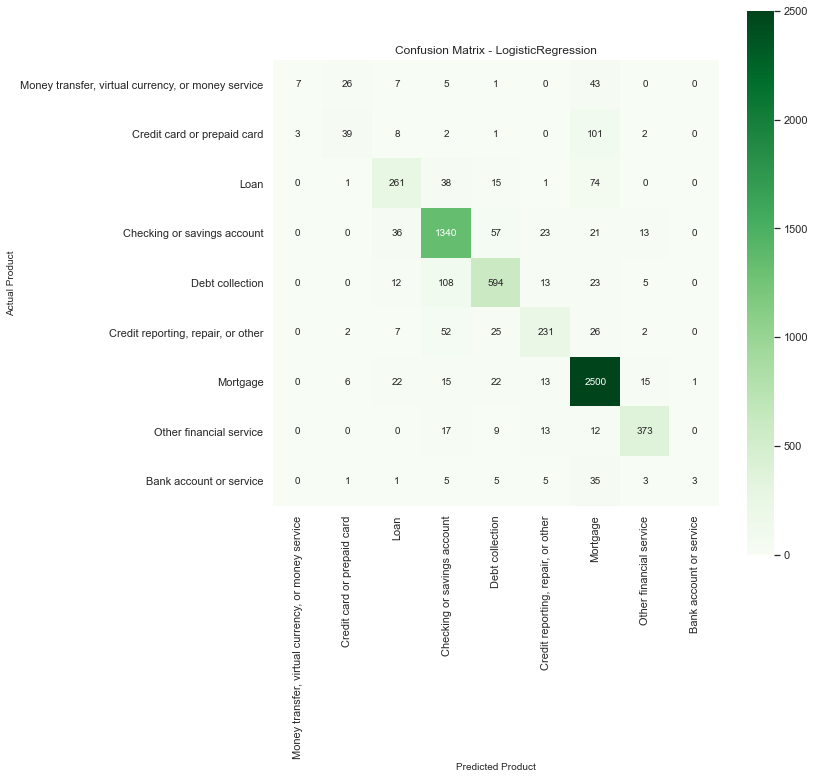

------------------------------
------------------------------
------------------------------
------------------------------
# Model: LinearSVC
LinearSVC Model Accuracy Score 84.09776225995874
------------------------------
------------------------------
# Classification Report
                                                    precision    recall  f1-score   support

                           Bank account or service       0.47      0.18      0.26        89
                       Checking or savings account       0.49      0.28      0.36       156
                       Credit card or prepaid card       0.71      0.68      0.70       390
                Credit reporting, repair, or other       0.84      0.88      0.86      1490
                                   Debt collection       0.80      0.78      0.79       755
                                              Loan       0.74      0.65      0.69       345
Money transfer, virtual currency, or money service       0.90      0.95      

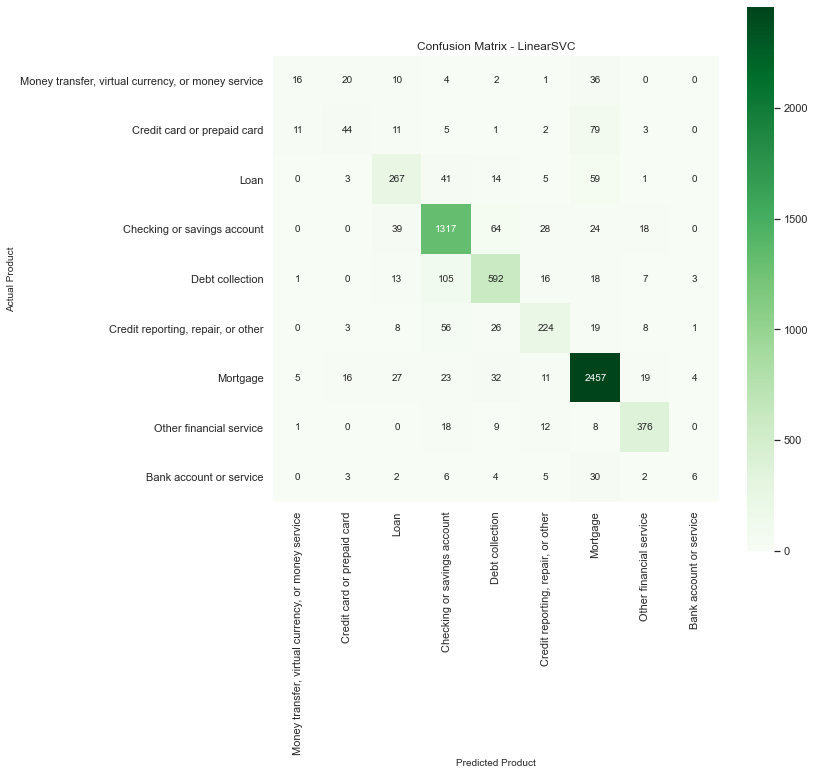

------------------------------
------------------------------


In [232]:
# Classification Report
p = products.drop_duplicates()
p = p.copy()

models = [
        ('LogisticRegression', LogisticRegression(random_state=seed)),
        ('LinearSVC', LinearSVC())
        ]
names = []
for name, model in models:
    model = model.fit(train_tokenize_TfidfVectorizer_1_clean, y_train)
    y_pred = model.predict(test_tokenize_TfidfVectorizer_1_clean)
    print("-"*30)
    print("-"*30)
    print("# Model: " + name)
    print(name + ' Model Accuracy Score', accuracy_score(y_test,y_prediction)*100)
    print("-"*30)
    print("-"*30)
    print('# Classification Report')
    print(classification_report(y_test, y_pred))
    print("-"*30)
    print("-"*30)
    print('Confusion Matrix for ' + name)
    #print(confusion_matrix(y_test, y_pred))
    conf_mat = confusion_matrix(y_test, y_pred)
    sns.set(font_scale=1)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(conf_mat, annot=True, annot_kws={"size":10}, cmap="RdYlGn", square=True, fmt='d',
                xticklabels= p.values, yticklabels= p.values)
    plt.ylabel('Actual Product', fontsize = 10)
    plt.xlabel('Predicted Product', fontsize = 10)
    plt.title('Confusion Matrix - '+ name)
    plt.show()
    print("-"*30)
    print("-"*30)
    #plot_precision_recall_curve(model, y_test, y_pred)
    #plt.title('Precision-Recall Curve - '+ name)
    #plt.show()


## Up Next

This notebook is only about the training of selected models. 

Due to the fact that this set of data is quite large, and the fact that the narratives are too large, after some tests, I encountered performance problems in the training and validation of the model, which led N times to the interruption of the Kernel or the training of some models internally, without stopping. This is because I am working locally on my laptop. So, I chose to work part of the selected models, for ngrams = 1 / with clean text of the narratives.

The performance of some models was surprising, namely the Logistic Regression model, because it was the one that showed better performance, compared to the others.

Based on the training of the models above, I chose to select the model with the best performance, to evaluate in more detail in the next phase.

In the next notebook, I'll use this model, training it again, so that I can predict the products for the classifications already made and analyze the behavior for new complaints.  

For that I will use the fourth notebook **05_model evaluation**.

-------------------------------------- END 04 Training model --------------------------------------